In [20]:
from pathlib import Path

audio = Path("D:\\dataset\\seno_puro_c_octavas.wav")
audio

WindowsPath('D:/dataset/seno_puro_c_octavas.wav')

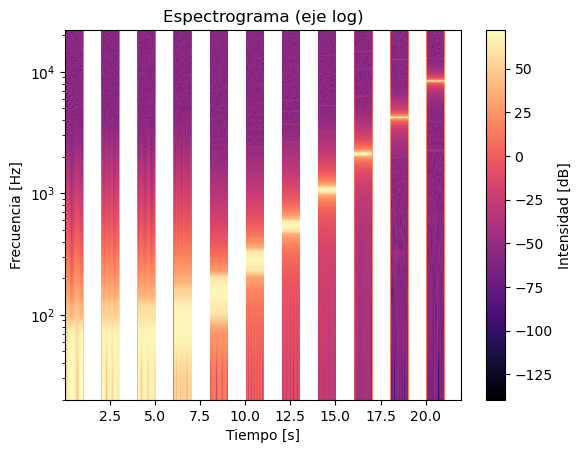

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Lee el archivo de audio
fs, data = wavfile.read(str(audio))  # fs = frecuencia de muestreo

# Si el audio es estéreo, toma un canal
if data.ndim > 1:
    data = data[:, 0]

# Calcula el espectrograma
Pxx, freqs, bins, im = plt.specgram(
    data, Fs=fs, NFFT=1024, noverlap=512, cmap="magma"
)

plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.title("Espectrograma (eje log)")

plt.yscale("log")
plt.ylim(20, fs/2)  # limita a rango audible

plt.colorbar(im, label="Intensidad [dB]")
plt.show()

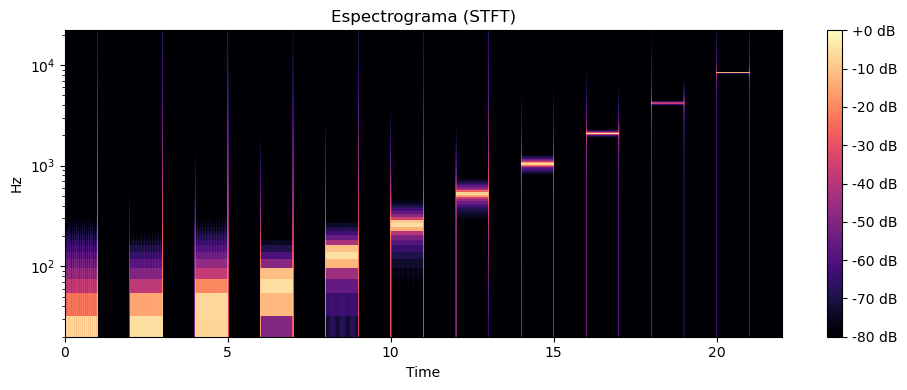

array([[-14.687195  ,  -4.7754097 ,  -0.63461304, ..., -80.        ,
        -80.        , -80.        ],
       [-16.391392  ,  -8.3449135 ,  -5.542759  , ..., -80.        ,
        -80.        , -80.        ],
       [-22.05486   , -22.104046  , -25.675896  , ..., -80.        ,
        -80.        , -80.        ],
       ...,
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]], dtype=float32)

In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Carga el audio
y, sr = librosa.load(str(audio), sr=None)  # sr=None para mantener la original

# Calcula el espectrograma (magnitud en escala dB)
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(S), ref=np.max)
#S_db = np.abs(S)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma (STFT)")
plt.tight_layout()

plt.yscale("log")
plt.ylim(20, fs/2)  # limita a rango audible

plt.show()
S_db

------------------------------------------
#### Crear sonido puro

In [19]:
import numpy as np
from scipy.io.wavfile import write

sample_rate = 44100
duration = 1.0  # segundos

def freq_from_note_number(note_number):
    return 440.0 * 2**((note_number - 69) / 12)

t = np.linspace(0, duration, int(sample_rate * duration), False)

audio = np.array([], dtype=np.float32)

# Notas C de cada octava, desde C-1 (0) hasta C9 (120) con pasos de 12
for note in range(0, 121, 12):
    f = freq_from_note_number(note)
    tone = 0.5 * np.sin(2 * np.pi * f * t)
    silence = np.zeros_like(t)
    audio = np.concatenate((audio, tone, silence))

audio_int16 = np.int16(audio / np.max(np.abs(audio)) * 32767)
write("seno_puro_c_octavas.wav", sample_rate, audio_int16)

print("Archivo creado: seno_puro_c_octavas.wav")


Archivo creado: seno_puro_c_octavas.wav
